In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(1, 16, 16)

In [4]:
t = np.linspace(0.1, 1.6, 16)

$y = 0.1x$,
$y = 0.2x$,
...,
$y = 1.6x$

In [5]:
sensors = np.zeros((16, 16))
for i in range(0, len(t)):
    for j in range(0, len(x)):
        sensors[i, j] = t[i] * x[j]

In [7]:
sensors = sensors.reshape(16, 16, 1)

In [15]:
sensors

array([[[ 0.1],
        [ 0.2],
        [ 0.3],
        [ 0.4],
        [ 0.5],
        [ 0.6],
        [ 0.7],
        [ 0.8],
        [ 0.9],
        [ 1. ],
        [ 1.1],
        [ 1.2],
        [ 1.3],
        [ 1.4],
        [ 1.5],
        [ 1.6]],

       [[ 0.2],
        [ 0.4],
        [ 0.6],
        [ 0.8],
        [ 1. ],
        [ 1.2],
        [ 1.4],
        [ 1.6],
        [ 1.8],
        [ 2. ],
        [ 2.2],
        [ 2.4],
        [ 2.6],
        [ 2.8],
        [ 3. ],
        [ 3.2]],

       [[ 0.3],
        [ 0.6],
        [ 0.9],
        [ 1.2],
        [ 1.5],
        [ 1.8],
        [ 2.1],
        [ 2.4],
        [ 2.7],
        [ 3. ],
        [ 3.3],
        [ 3.6],
        [ 3.9],
        [ 4.2],
        [ 4.5],
        [ 4.8]],

       [[ 0.4],
        [ 0.8],
        [ 1.2],
        [ 1.6],
        [ 2. ],
        [ 2.4],
        [ 2.8],
        [ 3.2],
        [ 3.6],
        [ 4. ],
        [ 4.4],
        [ 4.8],
        [ 5.2],
        [ 5.6],
  

In [8]:
sensors.shape

(16, 16, 1)

In [10]:
t = t.reshape((16, 1))

In [17]:
t_train, t_test, x_train, x_test = train_test_split(t, sensors, test_size=0.1, random_state=1)

In [18]:
t_test

array([[0.4],
       [1.4]])

In [38]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=5, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='thirdHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [39]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [40]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
1/1 [==============================] - 0s 243ms/step - loss: 85.7308 - rmse: 9.2591
Epoch 2/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.7285 - rmse: 9.2590
Epoch 3/10000
1/1 [==============================] - 0s 33ms/step - loss: 85.7262 - rmse: 9.2588
Epoch 4/10000
1/1 [==============================] - 0s 31ms/step - loss: 85.7239 - rmse: 9.2587
Epoch 5/10000
1/1 [==============================] - 0s 22ms/step - loss: 85.7217 - rmse: 9.2586
Epoch 6/10000
1/1 [==============================] - 0s 43ms/step - loss: 85.7194 - rmse: 9.2585
Epoch 7/10000
1/1 [==============================] - 0s 9ms/step - loss: 85.7172 - rmse: 9.2584
Epoch 8/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.7149 - rmse: 9.2582
Epoch 9/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.7126 - rmse: 9.2581
Epoch 10/10000
1/1 [==============================] - 0s 26ms/step - loss: 85.7104 - rmse: 9.2580
Epoch 11/10000
1/1 [============

1/1 [==============================] - 0s 3ms/step - loss: 85.5433 - rmse: 9.2490
Epoch 86/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.5411 - rmse: 9.2488
Epoch 87/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.5388 - rmse: 9.2487
Epoch 88/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.5366 - rmse: 9.2486
Epoch 89/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.5344 - rmse: 9.2485
Epoch 90/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.5321 - rmse: 9.2484
Epoch 91/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.5299 - rmse: 9.2482
Epoch 92/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.5276 - rmse: 9.2481
Epoch 93/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.5254 - rmse: 9.2480
Epoch 94/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.5232 - rmse: 9.2479
Epoch 95/10000
1/1 [=========================

1/1 [==============================] - 0s 4ms/step - loss: 85.3531 - rmse: 9.2387
Epoch 169/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.3507 - rmse: 9.2385
Epoch 170/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.3483 - rmse: 9.2384
Epoch 171/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.3459 - rmse: 9.2383
Epoch 172/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.3434 - rmse: 9.2382
Epoch 173/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.3410 - rmse: 9.2380
Epoch 174/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.3386 - rmse: 9.2379
Epoch 175/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.3361 - rmse: 9.2378
Epoch 176/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.3337 - rmse: 9.2376
Epoch 177/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.3312 - rmse: 9.2375
Epoch 178/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 85.1342 - rmse: 9.2268
Epoch 252/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.1313 - rmse: 9.2267
Epoch 253/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.1284 - rmse: 9.2265
Epoch 254/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.1254 - rmse: 9.2263
Epoch 255/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.1225 - rmse: 9.2262
Epoch 256/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.1196 - rmse: 9.2260
Epoch 257/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.1166 - rmse: 9.2259
Epoch 258/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.1137 - rmse: 9.2257
Epoch 259/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.1107 - rmse: 9.2255
Epoch 260/10000
1/1 [==============================] - 0s 6ms/step - loss: 85.1078 - rmse: 9.2254
Epoch 261/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 84.8516 - rmse: 9.2115
Epoch 335/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.8477 - rmse: 9.2113
Epoch 336/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.8438 - rmse: 9.2111
Epoch 337/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.8398 - rmse: 9.2109
Epoch 338/10000
1/1 [==============================] - 0s 3ms/step - loss: 84.8359 - rmse: 9.2106
Epoch 339/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.8319 - rmse: 9.2104
Epoch 340/10000
1/1 [==============================] - 0s 5ms/step - loss: 84.8280 - rmse: 9.2102
Epoch 341/10000
1/1 [==============================] - 0s 3ms/step - loss: 84.8240 - rmse: 9.2100
Epoch 342/10000
1/1 [==============================] - 0s 3ms/step - loss: 84.8200 - rmse: 9.2098
Epoch 343/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.8160 - rmse: 9.2096
Epoch 344/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 84.4875 - rmse: 9.1917
Epoch 418/10000
1/1 [==============================] - 0s 5ms/step - loss: 84.4827 - rmse: 9.1914
Epoch 419/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.4777 - rmse: 9.1912
Epoch 420/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.4728 - rmse: 9.1909
Epoch 421/10000
1/1 [==============================] - 0s 5ms/step - loss: 84.4679 - rmse: 9.1906
Epoch 422/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.4629 - rmse: 9.1904
Epoch 423/10000
1/1 [==============================] - 0s 9ms/step - loss: 84.4580 - rmse: 9.1901
Epoch 424/10000
1/1 [==============================] - 0s 5ms/step - loss: 84.4530 - rmse: 9.1898
Epoch 425/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.4480 - rmse: 9.1896
Epoch 426/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.4430 - rmse: 9.1893
Epoch 427/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 84.0379 - rmse: 9.1672
Epoch 501/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.0319 - rmse: 9.1669
Epoch 502/10000
1/1 [==============================] - 0s 8ms/step - loss: 84.0260 - rmse: 9.1666
Epoch 503/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.0200 - rmse: 9.1662
Epoch 504/10000
1/1 [==============================] - 0s 8ms/step - loss: 84.0140 - rmse: 9.1659
Epoch 505/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.0079 - rmse: 9.1656
Epoch 506/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.0019 - rmse: 9.1653
Epoch 507/10000
1/1 [==============================] - 0s 7ms/step - loss: 83.9958 - rmse: 9.1649
Epoch 508/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.9897 - rmse: 9.1646
Epoch 509/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.9837 - rmse: 9.1643
Epoch 510/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 83.4909 - rmse: 9.1373
Epoch 584/10000
1/1 [==============================] - 0s 10ms/step - loss: 83.4836 - rmse: 9.1369
Epoch 585/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.4763 - rmse: 9.1365
Epoch 586/10000
1/1 [==============================] - 0s 9ms/step - loss: 83.4690 - rmse: 9.1361
Epoch 587/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.4617 - rmse: 9.1357
Epoch 588/10000
1/1 [==============================] - 0s 10ms/step - loss: 83.4543 - rmse: 9.1353
Epoch 589/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.4469 - rmse: 9.1349
Epoch 590/10000
1/1 [==============================] - 0s 6ms/step - loss: 83.4396 - rmse: 9.1345
Epoch 591/10000
1/1 [==============================] - 0s 5ms/step - loss: 83.4322 - rmse: 9.1341
Epoch 592/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.4247 - rmse: 9.1337
Epoch 593/10000
1/1 [=============

1/1 [==============================] - 0s 9ms/step - loss: 82.8266 - rmse: 9.1009
Epoch 667/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.8178 - rmse: 9.1004
Epoch 668/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.8090 - rmse: 9.0999
Epoch 669/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.8002 - rmse: 9.0995
Epoch 670/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.7913 - rmse: 9.0990
Epoch 671/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.7825 - rmse: 9.0985
Epoch 672/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.7736 - rmse: 9.0980
Epoch 673/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.7647 - rmse: 9.0975
Epoch 674/10000
1/1 [==============================] - 0s 9ms/step - loss: 82.7558 - rmse: 9.0970
Epoch 675/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.7469 - rmse: 9.0965
Epoch 676/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 82.0326 - rmse: 9.0572
Epoch 750/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.0222 - rmse: 9.0566
Epoch 751/10000
1/1 [==============================] - 0s 8ms/step - loss: 82.0118 - rmse: 9.0560
Epoch 752/10000
1/1 [==============================] - 0s 3ms/step - loss: 82.0014 - rmse: 9.0555
Epoch 753/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.9909 - rmse: 9.0549
Epoch 754/10000
1/1 [==============================] - 0s 7ms/step - loss: 81.9805 - rmse: 9.0543
Epoch 755/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.9700 - rmse: 9.0537
Epoch 756/10000
1/1 [==============================] - 0s 8ms/step - loss: 81.9595 - rmse: 9.0531
Epoch 757/10000
1/1 [==============================] - 0s 3ms/step - loss: 81.9489 - rmse: 9.0526
Epoch 758/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.9384 - rmse: 9.0520
Epoch 759/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 81.1007 - rmse: 9.0056
Epoch 833/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.0886 - rmse: 9.0049
Epoch 834/10000
1/1 [==============================] - 0s 5ms/step - loss: 81.0765 - rmse: 9.0042
Epoch 835/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.0644 - rmse: 9.0036
Epoch 836/10000
1/1 [==============================] - 0s 9ms/step - loss: 81.0522 - rmse: 9.0029
Epoch 837/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.0400 - rmse: 9.0022
Epoch 838/10000
1/1 [==============================] - 0s 7ms/step - loss: 81.0278 - rmse: 9.0015
Epoch 839/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.0156 - rmse: 9.0009
Epoch 840/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.0033 - rmse: 9.0002
Epoch 841/10000
1/1 [==============================] - 0s 9ms/step - loss: 80.9910 - rmse: 8.9995
Epoch 842/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 80.0230 - rmse: 8.9456
Epoch 916/10000
1/1 [==============================] - 0s 4ms/step - loss: 80.0091 - rmse: 8.9448
Epoch 917/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.9952 - rmse: 8.9440
Epoch 918/10000
1/1 [==============================] - 0s 9ms/step - loss: 79.9812 - rmse: 8.9432
Epoch 919/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.9672 - rmse: 8.9424
Epoch 920/10000
1/1 [==============================] - 0s 9ms/step - loss: 79.9533 - rmse: 8.9417
Epoch 921/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.9392 - rmse: 8.9409
Epoch 922/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.9252 - rmse: 8.9401
Epoch 923/10000
1/1 [==============================] - 0s 6ms/step - loss: 79.9111 - rmse: 8.9393
Epoch 924/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.8971 - rmse: 8.9385
Epoch 925/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 78.7935 - rmse: 8.8766
Epoch 999/10000
1/1 [==============================] - 0s 4ms/step - loss: 78.7778 - rmse: 8.8757
Epoch 1000/10000
1/1 [==============================] - 0s 4ms/step - loss: 78.7620 - rmse: 8.8748
Epoch 1001/10000
1/1 [==============================] - 0s 4ms/step - loss: 78.7462 - rmse: 8.8739
Epoch 1002/10000
1/1 [==============================] - 0s 9ms/step - loss: 78.7304 - rmse: 8.8730
Epoch 1003/10000
1/1 [==============================] - 0s 4ms/step - loss: 78.7145 - rmse: 8.8721
Epoch 1004/10000
1/1 [==============================] - 0s 4ms/step - loss: 78.6987 - rmse: 8.8712
Epoch 1005/10000
1/1 [==============================] - 0s 7ms/step - loss: 78.6828 - rmse: 8.8703
Epoch 1006/10000
1/1 [==============================] - 0s 4ms/step - loss: 78.6669 - rmse: 8.8694
Epoch 1007/10000
1/1 [==============================] - 0s 4ms/step - loss: 78.6510 - rmse: 8.8685
Epoch 1008/10000
1/1 [======

1/1 [==============================] - 0s 4ms/step - loss: 77.4279 - rmse: 8.7993
Epoch 1081/10000
1/1 [==============================] - 0s 9ms/step - loss: 77.4103 - rmse: 8.7983
Epoch 1082/10000
1/1 [==============================] - 0s 4ms/step - loss: 77.3927 - rmse: 8.7973
Epoch 1083/10000
1/1 [==============================] - 0s 4ms/step - loss: 77.3751 - rmse: 8.7963
Epoch 1084/10000
1/1 [==============================] - 0s 8ms/step - loss: 77.3575 - rmse: 8.7953
Epoch 1085/10000
1/1 [==============================] - 0s 4ms/step - loss: 77.3398 - rmse: 8.7943
Epoch 1086/10000
1/1 [==============================] - 0s 9ms/step - loss: 77.3221 - rmse: 8.7933
Epoch 1087/10000
1/1 [==============================] - 0s 4ms/step - loss: 77.3044 - rmse: 8.7923
Epoch 1088/10000
1/1 [==============================] - 0s 3ms/step - loss: 77.2867 - rmse: 8.7913
Epoch 1089/10000
1/1 [==============================] - 0s 4ms/step - loss: 77.2689 - rmse: 8.7903
Epoch 1090/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 75.9135 - rmse: 8.7128
Epoch 1163/10000
1/1 [==============================] - 0s 3ms/step - loss: 75.8941 - rmse: 8.7117
Epoch 1164/10000
1/1 [==============================] - 0s 3ms/step - loss: 75.8747 - rmse: 8.7106
Epoch 1165/10000
1/1 [==============================] - 0s 4ms/step - loss: 75.8553 - rmse: 8.7095
Epoch 1166/10000
1/1 [==============================] - 0s 5ms/step - loss: 75.8359 - rmse: 8.7084
Epoch 1167/10000
1/1 [==============================] - 0s 4ms/step - loss: 75.8164 - rmse: 8.7073
Epoch 1168/10000
1/1 [==============================] - 0s 9ms/step - loss: 75.7969 - rmse: 8.7061
Epoch 1169/10000
1/1 [==============================] - 0s 4ms/step - loss: 75.7774 - rmse: 8.7050
Epoch 1170/10000
1/1 [==============================] - 0s 4ms/step - loss: 75.7579 - rmse: 8.7039
Epoch 1171/10000
1/1 [==============================] - 0s 6ms/step - loss: 75.7383 - rmse: 8.7028
Epoch 1172/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 74.2538 - rmse: 8.6171
Epoch 1245/10000
1/1 [==============================] - 0s 4ms/step - loss: 74.2327 - rmse: 8.6158
Epoch 1246/10000
1/1 [==============================] - 0s 8ms/step - loss: 74.2115 - rmse: 8.6146
Epoch 1247/10000
1/1 [==============================] - 0s 4ms/step - loss: 74.1904 - rmse: 8.6134
Epoch 1248/10000
1/1 [==============================] - 0s 4ms/step - loss: 74.1692 - rmse: 8.6122
Epoch 1249/10000
1/1 [==============================] - 0s 8ms/step - loss: 74.1480 - rmse: 8.6109
Epoch 1250/10000
1/1 [==============================] - 0s 4ms/step - loss: 74.1268 - rmse: 8.6097
Epoch 1251/10000
1/1 [==============================] - 0s 4ms/step - loss: 74.1055 - rmse: 8.6085
Epoch 1252/10000
1/1 [==============================] - 0s 4ms/step - loss: 74.0843 - rmse: 8.6072
Epoch 1253/10000
1/1 [==============================] - 0s 4ms/step - loss: 74.0630 - rmse: 8.6060
Epoch 1254/10000
1/1 [=====

1/1 [==============================] - 0s 8ms/step - loss: 72.4545 - rmse: 8.5120
Epoch 1327/10000
1/1 [==============================] - 0s 3ms/step - loss: 72.4317 - rmse: 8.5107
Epoch 1328/10000
1/1 [==============================] - 0s 3ms/step - loss: 72.4089 - rmse: 8.5093
Epoch 1329/10000
1/1 [==============================] - 0s 5ms/step - loss: 72.3861 - rmse: 8.5080
Epoch 1330/10000
1/1 [==============================] - 0s 4ms/step - loss: 72.3633 - rmse: 8.5067
Epoch 1331/10000
1/1 [==============================] - 0s 9ms/step - loss: 72.3404 - rmse: 8.5053
Epoch 1332/10000
1/1 [==============================] - 0s 4ms/step - loss: 72.3176 - rmse: 8.5040
Epoch 1333/10000
1/1 [==============================] - 0s 4ms/step - loss: 72.2947 - rmse: 8.5026
Epoch 1334/10000
1/1 [==============================] - 0s 5ms/step - loss: 72.2718 - rmse: 8.5013
Epoch 1335/10000
1/1 [==============================] - 0s 4ms/step - loss: 72.2488 - rmse: 8.4999
Epoch 1336/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 70.5236 - rmse: 8.3978
Epoch 1409/10000
1/1 [==============================] - 0s 3ms/step - loss: 70.4993 - rmse: 8.3964
Epoch 1410/10000
1/1 [==============================] - 0s 5ms/step - loss: 70.4750 - rmse: 8.3949
Epoch 1411/10000
1/1 [==============================] - 0s 4ms/step - loss: 70.4506 - rmse: 8.3935
Epoch 1412/10000
1/1 [==============================] - 0s 9ms/step - loss: 70.4263 - rmse: 8.3920
Epoch 1413/10000
1/1 [==============================] - 0s 4ms/step - loss: 70.4019 - rmse: 8.3906
Epoch 1414/10000
1/1 [==============================] - 0s 4ms/step - loss: 70.3774 - rmse: 8.3891
Epoch 1415/10000
1/1 [==============================] - 0s 5ms/step - loss: 70.3530 - rmse: 8.3877
Epoch 1416/10000
1/1 [==============================] - 0s 4ms/step - loss: 70.3286 - rmse: 8.3862
Epoch 1417/10000
1/1 [==============================] - 0s 4ms/step - loss: 70.3041 - rmse: 8.3848
Epoch 1418/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 68.4713 - rmse: 8.2747
Epoch 1491/10000
1/1 [==============================] - 0s 5ms/step - loss: 68.4456 - rmse: 8.2732
Epoch 1492/10000
1/1 [==============================] - 0s 5ms/step - loss: 68.4199 - rmse: 8.2716
Epoch 1493/10000
1/1 [==============================] - 0s 9ms/step - loss: 68.3941 - rmse: 8.2701
Epoch 1494/10000
1/1 [==============================] - 0s 4ms/step - loss: 68.3683 - rmse: 8.2685
Epoch 1495/10000
1/1 [==============================] - 0s 9ms/step - loss: 68.3425 - rmse: 8.2670
Epoch 1496/10000
1/1 [==============================] - 0s 4ms/step - loss: 68.3167 - rmse: 8.2654
Epoch 1497/10000
1/1 [==============================] - 0s 4ms/step - loss: 68.2909 - rmse: 8.2638
Epoch 1498/10000
1/1 [==============================] - 0s 5ms/step - loss: 68.2650 - rmse: 8.2623
Epoch 1499/10000
1/1 [==============================] - 0s 3ms/step - loss: 68.2392 - rmse: 8.2607
Epoch 1500/10000
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 66.3098 - rmse: 8.1431
Epoch 1573/10000
1/1 [==============================] - 0s 4ms/step - loss: 66.2829 - rmse: 8.1414
Epoch 1574/10000
1/1 [==============================] - 0s 5ms/step - loss: 66.2559 - rmse: 8.1398
Epoch 1575/10000
1/1 [==============================] - 0s 4ms/step - loss: 66.2289 - rmse: 8.1381
Epoch 1576/10000
1/1 [==============================] - 0s 9ms/step - loss: 66.2018 - rmse: 8.1365
Epoch 1577/10000
1/1 [==============================] - 0s 4ms/step - loss: 66.1748 - rmse: 8.1348
Epoch 1578/10000
1/1 [==============================] - 0s 4ms/step - loss: 66.1478 - rmse: 8.1331
Epoch 1579/10000
1/1 [==============================] - 0s 6ms/step - loss: 66.1207 - rmse: 8.1315
Epoch 1580/10000
1/1 [==============================] - 0s 4ms/step - loss: 66.0936 - rmse: 8.1298
Epoch 1581/10000
1/1 [==============================] - 0s 9ms/step - loss: 66.0665 - rmse: 8.1281
Epoch 1582/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 64.0534 - rmse: 8.0033
Epoch 1655/10000
1/1 [==============================] - 0s 4ms/step - loss: 64.0253 - rmse: 8.0016
Epoch 1656/10000
1/1 [==============================] - 0s 3ms/step - loss: 63.9973 - rmse: 7.9998
Epoch 1657/10000
1/1 [==============================] - 0s 4ms/step - loss: 63.9692 - rmse: 7.9981
Epoch 1658/10000
1/1 [==============================] - 0s 5ms/step - loss: 63.9412 - rmse: 7.9963
Epoch 1659/10000
1/1 [==============================] - 0s 5ms/step - loss: 63.9131 - rmse: 7.9946
Epoch 1660/10000
1/1 [==============================] - 0s 4ms/step - loss: 63.8850 - rmse: 7.9928
Epoch 1661/10000
1/1 [==============================] - 0s 8ms/step - loss: 63.8569 - rmse: 7.9910
Epoch 1662/10000
1/1 [==============================] - 0s 3ms/step - loss: 63.8287 - rmse: 7.9893
Epoch 1663/10000
1/1 [==============================] - 0s 4ms/step - loss: 63.8006 - rmse: 7.9875
Epoch 1664/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 61.7178 - rmse: 7.8561
Epoch 1737/10000
1/1 [==============================] - 0s 10ms/step - loss: 61.6889 - rmse: 7.8542
Epoch 1738/10000
1/1 [==============================] - 0s 4ms/step - loss: 61.6600 - rmse: 7.8524
Epoch 1739/10000
1/1 [==============================] - 0s 4ms/step - loss: 61.6311 - rmse: 7.8505
Epoch 1740/10000
1/1 [==============================] - 0s 4ms/step - loss: 61.6022 - rmse: 7.8487
Epoch 1741/10000
1/1 [==============================] - 0s 4ms/step - loss: 61.5732 - rmse: 7.8469
Epoch 1742/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.5443 - rmse: 7.8450
Epoch 1743/10000
1/1 [==============================] - 0s 4ms/step - loss: 61.5153 - rmse: 7.8432
Epoch 1744/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.4864 - rmse: 7.8413
Epoch 1745/10000
1/1 [==============================] - 0s 4ms/step - loss: 61.4574 - rmse: 7.8395
Epoch 1746/10000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 59.3202 - rmse: 7.7020
Epoch 1819/10000
1/1 [==============================] - 0s 4ms/step - loss: 59.2907 - rmse: 7.7000
Epoch 1820/10000
1/1 [==============================] - 0s 8ms/step - loss: 59.2611 - rmse: 7.6981
Epoch 1821/10000
1/1 [==============================] - 0s 4ms/step - loss: 59.2316 - rmse: 7.6962
Epoch 1822/10000
1/1 [==============================] - 0s 9ms/step - loss: 59.2020 - rmse: 7.6943
Epoch 1823/10000
1/1 [==============================] - 0s 4ms/step - loss: 59.1724 - rmse: 7.6924
Epoch 1824/10000
1/1 [==============================] - 0s 4ms/step - loss: 59.1428 - rmse: 7.6904
Epoch 1825/10000
1/1 [==============================] - 0s 4ms/step - loss: 59.1133 - rmse: 7.6885
Epoch 1826/10000
1/1 [==============================] - 0s 4ms/step - loss: 59.0837 - rmse: 7.6866
Epoch 1827/10000
1/1 [==============================] - 0s 9ms/step - loss: 59.0541 - rmse: 7.6847
Epoch 1828/10000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 56.8784 - rmse: 7.5418
Epoch 1901/10000
1/1 [==============================] - 0s 4ms/step - loss: 56.8484 - rmse: 7.5398
Epoch 1902/10000
1/1 [==============================] - 0s 9ms/step - loss: 56.8184 - rmse: 7.5378
Epoch 1903/10000
1/1 [==============================] - 0s 4ms/step - loss: 56.7884 - rmse: 7.5358
Epoch 1904/10000
1/1 [==============================] - 0s 6ms/step - loss: 56.7585 - rmse: 7.5338
Epoch 1905/10000
1/1 [==============================] - 0s 4ms/step - loss: 56.7285 - rmse: 7.5318
Epoch 1906/10000
1/1 [==============================] - 0s 4ms/step - loss: 56.6985 - rmse: 7.5298
Epoch 1907/10000
1/1 [==============================] - 0s 9ms/step - loss: 56.6685 - rmse: 7.5278
Epoch 1908/10000
1/1 [==============================] - 0s 4ms/step - loss: 56.6385 - rmse: 7.5259
Epoch 1909/10000
1/1 [==============================] - 0s 4ms/step - loss: 56.6084 - rmse: 7.5239
Epoch 1910/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 54.4100 - rmse: 7.3763
Epoch 1983/10000
1/1 [==============================] - 0s 9ms/step - loss: 54.3798 - rmse: 7.3743
Epoch 1984/10000
1/1 [==============================] - 0s 4ms/step - loss: 54.3496 - rmse: 7.3722
Epoch 1985/10000
1/1 [==============================] - 0s 3ms/step - loss: 54.3194 - rmse: 7.3702
Epoch 1986/10000
1/1 [==============================] - 0s 7ms/step - loss: 54.2892 - rmse: 7.3681
Epoch 1987/10000
1/1 [==============================] - 0s 4ms/step - loss: 54.2590 - rmse: 7.3661
Epoch 1988/10000
1/1 [==============================] - 0s 8ms/step - loss: 54.2288 - rmse: 7.3640
Epoch 1989/10000
1/1 [==============================] - 0s 4ms/step - loss: 54.1986 - rmse: 7.3620
Epoch 1990/10000
1/1 [==============================] - 0s 4ms/step - loss: 54.1684 - rmse: 7.3599
Epoch 1991/10000
1/1 [==============================] - 0s 9ms/step - loss: 54.1382 - rmse: 7.3579
Epoch 1992/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 51.9322 - rmse: 7.2064
Epoch 2065/10000
1/1 [==============================] - 0s 9ms/step - loss: 51.9020 - rmse: 7.2043
Epoch 2066/10000
1/1 [==============================] - 0s 4ms/step - loss: 51.8718 - rmse: 7.2022
Epoch 2067/10000
1/1 [==============================] - 0s 4ms/step - loss: 51.8416 - rmse: 7.2001
Epoch 2068/10000
1/1 [==============================] - 0s 4ms/step - loss: 51.8113 - rmse: 7.1980
Epoch 2069/10000
1/1 [==============================] - 0s 4ms/step - loss: 51.7811 - rmse: 7.1959
Epoch 2070/10000
1/1 [==============================] - 0s 9ms/step - loss: 51.7509 - rmse: 7.1938
Epoch 2071/10000
1/1 [==============================] - 0s 4ms/step - loss: 51.7207 - rmse: 7.1917
Epoch 2072/10000
1/1 [==============================] - 0s 4ms/step - loss: 51.6905 - rmse: 7.1896
Epoch 2073/10000
1/1 [==============================] - 0s 4ms/step - loss: 51.6603 - rmse: 7.1875
Epoch 2074/10000
1/1 [=====

1/1 [==============================] - 0s 8ms/step - loss: 49.4605 - rmse: 7.0328
Epoch 2147/10000
1/1 [==============================] - 0s 4ms/step - loss: 49.4304 - rmse: 7.0307
Epoch 2148/10000
1/1 [==============================] - 0s 4ms/step - loss: 49.4004 - rmse: 7.0285
Epoch 2149/10000
1/1 [==============================] - 0s 5ms/step - loss: 49.3704 - rmse: 7.0264
Epoch 2150/10000
1/1 [==============================] - 0s 4ms/step - loss: 49.3403 - rmse: 7.0243
Epoch 2151/10000
1/1 [==============================] - 0s 9ms/step - loss: 49.3103 - rmse: 7.0221
Epoch 2152/10000
1/1 [==============================] - 0s 4ms/step - loss: 49.2803 - rmse: 7.0200
Epoch 2153/10000
1/1 [==============================] - 0s 4ms/step - loss: 49.2502 - rmse: 7.0179
Epoch 2154/10000
1/1 [==============================] - 0s 4ms/step - loss: 49.2202 - rmse: 7.0157
Epoch 2155/10000
1/1 [==============================] - 0s 4ms/step - loss: 49.1902 - rmse: 7.0136
Epoch 2156/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 47.0087 - rmse: 6.8563
Epoch 2229/10000
1/1 [==============================] - 0s 9ms/step - loss: 46.9790 - rmse: 6.8541
Epoch 2230/10000
1/1 [==============================] - 0s 4ms/step - loss: 46.9492 - rmse: 6.8520
Epoch 2231/10000
1/1 [==============================] - 0s 4ms/step - loss: 46.9195 - rmse: 6.8498
Epoch 2232/10000
1/1 [==============================] - 0s 5ms/step - loss: 46.8898 - rmse: 6.8476
Epoch 2233/10000
1/1 [==============================] - 0s 4ms/step - loss: 46.8601 - rmse: 6.8454
Epoch 2234/10000
1/1 [==============================] - 0s 8ms/step - loss: 46.8304 - rmse: 6.8433
Epoch 2235/10000
1/1 [==============================] - 0s 5ms/step - loss: 46.8007 - rmse: 6.8411
Epoch 2236/10000
1/1 [==============================] - 0s 5ms/step - loss: 46.7710 - rmse: 6.8389
Epoch 2237/10000
1/1 [==============================] - 0s 4ms/step - loss: 46.7413 - rmse: 6.8368
Epoch 2238/10000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 44.5887 - rmse: 6.6775
Epoch 2311/10000
1/1 [==============================] - 0s 4ms/step - loss: 44.5594 - rmse: 6.6753
Epoch 2312/10000
1/1 [==============================] - 0s 9ms/step - loss: 44.5302 - rmse: 6.6731
Epoch 2313/10000
1/1 [==============================] - 0s 4ms/step - loss: 44.5009 - rmse: 6.6709
Epoch 2314/10000
1/1 [==============================] - 0s 4ms/step - loss: 44.4716 - rmse: 6.6687
Epoch 2315/10000
1/1 [==============================] - 0s 4ms/step - loss: 44.4424 - rmse: 6.6665
Epoch 2316/10000
1/1 [==============================] - 0s 4ms/step - loss: 44.4132 - rmse: 6.6643
Epoch 2317/10000
1/1 [==============================] - 0s 9ms/step - loss: 44.3839 - rmse: 6.6621
Epoch 2318/10000
1/1 [==============================] - 0s 4ms/step - loss: 44.3547 - rmse: 6.6599
Epoch 2319/10000
1/1 [==============================] - 0s 4ms/step - loss: 44.3255 - rmse: 6.6577
Epoch 2320/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 42.2109 - rmse: 6.4970
Epoch 2393/10000
1/1 [==============================] - 0s 6ms/step - loss: 42.1822 - rmse: 6.4948
Epoch 2394/10000
1/1 [==============================] - 0s 5ms/step - loss: 42.1535 - rmse: 6.4926
Epoch 2395/10000
1/1 [==============================] - 0s 9ms/step - loss: 42.1249 - rmse: 6.4904
Epoch 2396/10000
1/1 [==============================] - 0s 4ms/step - loss: 42.0962 - rmse: 6.4882
Epoch 2397/10000
1/1 [==============================] - 0s 9ms/step - loss: 42.0675 - rmse: 6.4859
Epoch 2398/10000
1/1 [==============================] - 0s 5ms/step - loss: 42.0389 - rmse: 6.4837
Epoch 2399/10000
1/1 [==============================] - 0s 8ms/step - loss: 42.0102 - rmse: 6.4815
Epoch 2400/10000
1/1 [==============================] - 0s 4ms/step - loss: 41.9816 - rmse: 6.4793
Epoch 2401/10000
1/1 [==============================] - 0s 4ms/step - loss: 41.9529 - rmse: 6.4771
Epoch 2402/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 39.8846 - rmse: 6.3154
Epoch 2475/10000
1/1 [==============================] - 0s 9ms/step - loss: 39.8565 - rmse: 6.3132
Epoch 2476/10000
1/1 [==============================] - 0s 4ms/step - loss: 39.8285 - rmse: 6.3110
Epoch 2477/10000
1/1 [==============================] - 0s 4ms/step - loss: 39.8005 - rmse: 6.3088
Epoch 2478/10000
1/1 [==============================] - 0s 6ms/step - loss: 39.7725 - rmse: 6.3065
Epoch 2479/10000
1/1 [==============================] - 0s 3ms/step - loss: 39.7446 - rmse: 6.3043
Epoch 2480/10000
1/1 [==============================] - 0s 9ms/step - loss: 39.7166 - rmse: 6.3021
Epoch 2481/10000
1/1 [==============================] - 0s 4ms/step - loss: 39.6886 - rmse: 6.2999
Epoch 2482/10000
1/1 [==============================] - 0s 4ms/step - loss: 39.6607 - rmse: 6.2977
Epoch 2483/10000
1/1 [==============================] - 0s 4ms/step - loss: 39.6327 - rmse: 6.2955
Epoch 2484/10000
1/1 [=====

1/1 [==============================] - 0s 8ms/step - loss: 37.6175 - rmse: 6.1333
Epoch 2557/10000
1/1 [==============================] - 0s 4ms/step - loss: 37.5903 - rmse: 6.1311
Epoch 2558/10000
1/1 [==============================] - 0s 8ms/step - loss: 37.5630 - rmse: 6.1289
Epoch 2559/10000
1/1 [==============================] - 0s 4ms/step - loss: 37.5358 - rmse: 6.1266
Epoch 2560/10000
1/1 [==============================] - 0s 4ms/step - loss: 37.5085 - rmse: 6.1244
Epoch 2561/10000
1/1 [==============================] - 0s 6ms/step - loss: 37.4813 - rmse: 6.1222
Epoch 2562/10000
1/1 [==============================] - 0s 4ms/step - loss: 37.4541 - rmse: 6.1200
Epoch 2563/10000
1/1 [==============================] - 0s 9ms/step - loss: 37.4269 - rmse: 6.1178
Epoch 2564/10000
1/1 [==============================] - 0s 4ms/step - loss: 37.3998 - rmse: 6.1155
Epoch 2565/10000
1/1 [==============================] - 0s 4ms/step - loss: 37.3726 - rmse: 6.1133
Epoch 2566/10000
1/1 [=====

1/1 [==============================] - 0s 10ms/step - loss: 35.4163 - rmse: 5.9512
Epoch 2639/10000
1/1 [==============================] - 0s 4ms/step - loss: 35.3899 - rmse: 5.9489
Epoch 2640/10000
1/1 [==============================] - 0s 4ms/step - loss: 35.3634 - rmse: 5.9467
Epoch 2641/10000
1/1 [==============================] - 0s 5ms/step - loss: 35.3371 - rmse: 5.9445
Epoch 2642/10000
1/1 [==============================] - 0s 3ms/step - loss: 35.3107 - rmse: 5.9423
Epoch 2643/10000
1/1 [==============================] - 0s 8ms/step - loss: 35.2843 - rmse: 5.9401
Epoch 2644/10000
1/1 [==============================] - 0s 3ms/step - loss: 35.2579 - rmse: 5.9378
Epoch 2645/10000
1/1 [==============================] - 0s 3ms/step - loss: 35.2316 - rmse: 5.9356
Epoch 2646/10000
1/1 [==============================] - 0s 7ms/step - loss: 35.2052 - rmse: 5.9334
Epoch 2647/10000
1/1 [==============================] - 0s 4ms/step - loss: 35.1789 - rmse: 5.9312
Epoch 2648/10000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 33.2863 - rmse: 5.7694
Epoch 2721/10000
1/1 [==============================] - 0s 4ms/step - loss: 33.2607 - rmse: 5.7672
Epoch 2722/10000
1/1 [==============================] - 0s 4ms/step - loss: 33.2352 - rmse: 5.7650
Epoch 2723/10000
1/1 [==============================] - 0s 9ms/step - loss: 33.2097 - rmse: 5.7628
Epoch 2724/10000
1/1 [==============================] - 0s 4ms/step - loss: 33.1843 - rmse: 5.7606
Epoch 2725/10000
1/1 [==============================] - 0s 4ms/step - loss: 33.1588 - rmse: 5.7584
Epoch 2726/10000
1/1 [==============================] - 0s 7ms/step - loss: 33.1333 - rmse: 5.7562
Epoch 2727/10000
1/1 [==============================] - 0s 3ms/step - loss: 33.1079 - rmse: 5.7539
Epoch 2728/10000
1/1 [==============================] - 0s 9ms/step - loss: 33.0825 - rmse: 5.7517
Epoch 2729/10000
1/1 [==============================] - 0s 4ms/step - loss: 33.0570 - rmse: 5.7495
Epoch 2730/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 31.2316 - rmse: 5.5885
Epoch 2803/10000
1/1 [==============================] - 0s 9ms/step - loss: 31.2070 - rmse: 5.5863
Epoch 2804/10000
1/1 [==============================] - 0s 4ms/step - loss: 31.1824 - rmse: 5.5841
Epoch 2805/10000
1/1 [==============================] - 0s 4ms/step - loss: 31.1579 - rmse: 5.5819
Epoch 2806/10000
1/1 [==============================] - 0s 5ms/step - loss: 31.1333 - rmse: 5.5797
Epoch 2807/10000
1/1 [==============================] - 0s 3ms/step - loss: 31.1088 - rmse: 5.5775
Epoch 2808/10000
1/1 [==============================] - 0s 9ms/step - loss: 31.0843 - rmse: 5.5753
Epoch 2809/10000
1/1 [==============================] - 0s 4ms/step - loss: 31.0598 - rmse: 5.5731
Epoch 2810/10000
1/1 [==============================] - 0s 4ms/step - loss: 31.0352 - rmse: 5.5709
Epoch 2811/10000
1/1 [==============================] - 0s 4ms/step - loss: 31.0108 - rmse: 5.5687
Epoch 2812/10000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 29.2551 - rmse: 5.4088
Epoch 2885/10000
1/1 [==============================] - 0s 4ms/step - loss: 29.2315 - rmse: 5.4066
Epoch 2886/10000
1/1 [==============================] - 0s 4ms/step - loss: 29.2079 - rmse: 5.4044
Epoch 2887/10000
1/1 [==============================] - 0s 5ms/step - loss: 29.1842 - rmse: 5.4022
Epoch 2888/10000
1/1 [==============================] - 0s 3ms/step - loss: 29.1607 - rmse: 5.4001
Epoch 2889/10000
1/1 [==============================] - 0s 8ms/step - loss: 29.1371 - rmse: 5.3979
Epoch 2890/10000
1/1 [==============================] - 0s 4ms/step - loss: 29.1136 - rmse: 5.3957
Epoch 2891/10000
1/1 [==============================] - 0s 3ms/step - loss: 29.0900 - rmse: 5.3935
Epoch 2892/10000
1/1 [==============================] - 0s 4ms/step - loss: 29.0665 - rmse: 5.3913
Epoch 2893/10000
1/1 [==============================] - 0s 4ms/step - loss: 29.0430 - rmse: 5.3892
Epoch 2894/10000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 27.3585 - rmse: 5.2305
Epoch 2967/10000
1/1 [==============================] - 0s 4ms/step - loss: 27.3358 - rmse: 5.2284
Epoch 2968/10000
1/1 [==============================] - 0s 4ms/step - loss: 27.3132 - rmse: 5.2262
Epoch 2969/10000
1/1 [==============================] - 0s 6ms/step - loss: 27.2906 - rmse: 5.2240
Epoch 2970/10000
1/1 [==============================] - 0s 3ms/step - loss: 27.2680 - rmse: 5.2219
Epoch 2971/10000
1/1 [==============================] - 0s 9ms/step - loss: 27.2455 - rmse: 5.2197
Epoch 2972/10000
1/1 [==============================] - 0s 4ms/step - loss: 27.2229 - rmse: 5.2176
Epoch 2973/10000
1/1 [==============================] - 0s 4ms/step - loss: 27.2003 - rmse: 5.2154
Epoch 2974/10000
1/1 [==============================] - 0s 4ms/step - loss: 27.1778 - rmse: 5.2132
Epoch 2975/10000
1/1 [==============================] - 0s 4ms/step - loss: 27.1553 - rmse: 5.2111
Epoch 2976/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 25.5426 - rmse: 5.0540
Epoch 3049/10000
1/1 [==============================] - 0s 7ms/step - loss: 25.5210 - rmse: 5.0518
Epoch 3050/10000
1/1 [==============================] - 0s 3ms/step - loss: 25.4993 - rmse: 5.0497
Epoch 3051/10000
1/1 [==============================] - 0s 6ms/step - loss: 25.4777 - rmse: 5.0475
Epoch 3052/10000
1/1 [==============================] - 0s 4ms/step - loss: 25.4561 - rmse: 5.0454
Epoch 3053/10000
1/1 [==============================] - 0s 3ms/step - loss: 25.4345 - rmse: 5.0433
Epoch 3054/10000
1/1 [==============================] - 0s 8ms/step - loss: 25.4129 - rmse: 5.0411
Epoch 3055/10000
1/1 [==============================] - 0s 3ms/step - loss: 25.3913 - rmse: 5.0390
Epoch 3056/10000
1/1 [==============================] - 0s 3ms/step - loss: 25.3697 - rmse: 5.0368
Epoch 3057/10000
1/1 [==============================] - 0s 5ms/step - loss: 25.3482 - rmse: 5.0347
Epoch 3058/10000
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 23.8063 - rmse: 4.8792
Epoch 3131/10000
1/1 [==============================] - 0s 7ms/step - loss: 23.7856 - rmse: 4.8770
Epoch 3132/10000
1/1 [==============================] - 0s 4ms/step - loss: 23.7649 - rmse: 4.8749
Epoch 3133/10000
1/1 [==============================] - 0s 9ms/step - loss: 23.7442 - rmse: 4.8728
Epoch 3134/10000
1/1 [==============================] - 0s 4ms/step - loss: 23.7236 - rmse: 4.8707
Epoch 3135/10000
1/1 [==============================] - 0s 4ms/step - loss: 23.7030 - rmse: 4.8686
Epoch 3136/10000
1/1 [==============================] - 0s 5ms/step - loss: 23.6823 - rmse: 4.8664
Epoch 3137/10000
1/1 [==============================] - 0s 4ms/step - loss: 23.6617 - rmse: 4.8643
Epoch 3138/10000
1/1 [==============================] - 0s 3ms/step - loss: 23.6411 - rmse: 4.8622
Epoch 3139/10000
1/1 [==============================] - 0s 3ms/step - loss: 23.6205 - rmse: 4.8601
Epoch 3140/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 22.1482 - rmse: 4.7062
Epoch 3213/10000
1/1 [==============================] - 0s 5ms/step - loss: 22.1284 - rmse: 4.7041
Epoch 3214/10000
1/1 [==============================] - 0s 4ms/step - loss: 22.1087 - rmse: 4.7020
Epoch 3215/10000
1/1 [==============================] - 0s 4ms/step - loss: 22.0889 - rmse: 4.6999
Epoch 3216/10000
1/1 [==============================] - 0s 9ms/step - loss: 22.0692 - rmse: 4.6978
Epoch 3217/10000
1/1 [==============================] - 0s 4ms/step - loss: 22.0495 - rmse: 4.6957
Epoch 3218/10000
1/1 [==============================] - 0s 4ms/step - loss: 22.0298 - rmse: 4.6936
Epoch 3219/10000
1/1 [==============================] - 0s 5ms/step - loss: 22.0101 - rmse: 4.6915
Epoch 3220/10000
1/1 [==============================] - 0s 4ms/step - loss: 21.9905 - rmse: 4.6894
Epoch 3221/10000
1/1 [==============================] - 0s 9ms/step - loss: 21.9708 - rmse: 4.6873
Epoch 3222/10000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 20.5667 - rmse: 4.5351
Epoch 3295/10000
1/1 [==============================] - 0s 4ms/step - loss: 20.5479 - rmse: 4.5330
Epoch 3296/10000
1/1 [==============================] - 0s 8ms/step - loss: 20.5291 - rmse: 4.5309
Epoch 3297/10000
1/1 [==============================] - 0s 4ms/step - loss: 20.5104 - rmse: 4.5288
Epoch 3298/10000
1/1 [==============================] - 0s 4ms/step - loss: 20.4916 - rmse: 4.5268
Epoch 3299/10000
1/1 [==============================] - 0s 9ms/step - loss: 20.4728 - rmse: 4.5247
Epoch 3300/10000
1/1 [==============================] - 0s 3ms/step - loss: 20.4541 - rmse: 4.5226
Epoch 3301/10000
1/1 [==============================] - 0s 5ms/step - loss: 20.4353 - rmse: 4.5205
Epoch 3302/10000
1/1 [==============================] - 0s 4ms/step - loss: 20.4166 - rmse: 4.5185
Epoch 3303/10000
1/1 [==============================] - 0s 4ms/step - loss: 20.3979 - rmse: 4.5164
Epoch 3304/10000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 19.0624 - rmse: 4.3660
Epoch 3377/10000
1/1 [==============================] - 0s 4ms/step - loss: 19.0445 - rmse: 4.3640
Epoch 3378/10000
1/1 [==============================] - 0s 5ms/step - loss: 19.0266 - rmse: 4.3619
Epoch 3379/10000
1/1 [==============================] - 0s 4ms/step - loss: 19.0087 - rmse: 4.3599
Epoch 3380/10000
1/1 [==============================] - 0s 8ms/step - loss: 18.9909 - rmse: 4.3579
Epoch 3381/10000
1/1 [==============================] - 0s 4ms/step - loss: 18.9731 - rmse: 4.3558
Epoch 3382/10000
1/1 [==============================] - 0s 4ms/step - loss: 18.9553 - rmse: 4.3538
Epoch 3383/10000
1/1 [==============================] - 0s 5ms/step - loss: 18.9375 - rmse: 4.3517
Epoch 3384/10000
1/1 [==============================] - 0s 4ms/step - loss: 18.9197 - rmse: 4.3497
Epoch 3385/10000
1/1 [==============================] - 0s 6ms/step - loss: 18.9019 - rmse: 4.3476
Epoch 3386/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 17.6352 - rmse: 4.1994
Epoch 3459/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.6183 - rmse: 4.1974
Epoch 3460/10000
1/1 [==============================] - 0s 6ms/step - loss: 17.6014 - rmse: 4.1954
Epoch 3461/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.5845 - rmse: 4.1934
Epoch 3462/10000
1/1 [==============================] - 0s 9ms/step - loss: 17.5676 - rmse: 4.1914
Epoch 3463/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.5508 - rmse: 4.1894
Epoch 3464/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.5339 - rmse: 4.1873
Epoch 3465/10000
1/1 [==============================] - 0s 8ms/step - loss: 17.5171 - rmse: 4.1853
Epoch 3466/10000
1/1 [==============================] - 0s 3ms/step - loss: 17.5002 - rmse: 4.1833
Epoch 3467/10000
1/1 [==============================] - 0s 8ms/step - loss: 17.4834 - rmse: 4.1813
Epoch 3468/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 16.2872 - rmse: 4.0357
Epoch 3541/10000
1/1 [==============================] - 0s 7ms/step - loss: 16.2713 - rmse: 4.0338
Epoch 3542/10000
1/1 [==============================] - 0s 3ms/step - loss: 16.2553 - rmse: 4.0318
Epoch 3543/10000
1/1 [==============================] - 0s 3ms/step - loss: 16.2394 - rmse: 4.0298
Epoch 3544/10000
1/1 [==============================] - 0s 9ms/step - loss: 16.2235 - rmse: 4.0278
Epoch 3545/10000
1/1 [==============================] - 0s 4ms/step - loss: 16.2076 - rmse: 4.0259
Epoch 3546/10000
1/1 [==============================] - 0s 5ms/step - loss: 16.1917 - rmse: 4.0239
Epoch 3547/10000
1/1 [==============================] - 0s 4ms/step - loss: 16.1758 - rmse: 4.0219
Epoch 3548/10000
1/1 [==============================] - 0s 4ms/step - loss: 16.1599 - rmse: 4.0199
Epoch 3549/10000
1/1 [==============================] - 0s 6ms/step - loss: 16.1440 - rmse: 4.0180
Epoch 3550/10000
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 15.0195 - rmse: 3.8755
Epoch 3623/10000
1/1 [==============================] - 0s 8ms/step - loss: 15.0046 - rmse: 3.8736
Epoch 3624/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.9896 - rmse: 3.8716
Epoch 3625/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.9747 - rmse: 3.8697
Epoch 3626/10000
1/1 [==============================] - 0s 6ms/step - loss: 14.9598 - rmse: 3.8678
Epoch 3627/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.9449 - rmse: 3.8659
Epoch 3628/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.9300 - rmse: 3.8639
Epoch 3629/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.9151 - rmse: 3.8620
Epoch 3630/10000
1/1 [==============================] - 0s 3ms/step - loss: 14.9003 - rmse: 3.8601
Epoch 3631/10000
1/1 [==============================] - 0s 9ms/step - loss: 14.8854 - rmse: 3.8582
Epoch 3632/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 13.8338 - rmse: 3.7194
Epoch 3705/10000
1/1 [==============================] - 0s 8ms/step - loss: 13.8199 - rmse: 3.7175
Epoch 3706/10000
1/1 [==============================] - 0s 4ms/step - loss: 13.8059 - rmse: 3.7156
Epoch 3707/10000
1/1 [==============================] - 0s 7ms/step - loss: 13.7920 - rmse: 3.7138
Epoch 3708/10000
1/1 [==============================] - 0s 3ms/step - loss: 13.7781 - rmse: 3.7119
Epoch 3709/10000
1/1 [==============================] - 0s 4ms/step - loss: 13.7641 - rmse: 3.7100
Epoch 3710/10000
1/1 [==============================] - 0s 9ms/step - loss: 13.7502 - rmse: 3.7081
Epoch 3711/10000
1/1 [==============================] - 0s 4ms/step - loss: 13.7364 - rmse: 3.7063
Epoch 3712/10000
1/1 [==============================] - 0s 4ms/step - loss: 13.7225 - rmse: 3.7044
Epoch 3713/10000
1/1 [==============================] - 0s 4ms/step - loss: 13.7086 - rmse: 3.7025
Epoch 3714/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 12.7304 - rmse: 3.5680
Epoch 3787/10000
1/1 [==============================] - 0s 4ms/step - loss: 12.7175 - rmse: 3.5662
Epoch 3788/10000
1/1 [==============================] - 0s 7ms/step - loss: 12.7045 - rmse: 3.5643
Epoch 3789/10000
1/1 [==============================] - 0s 4ms/step - loss: 12.6916 - rmse: 3.5625
Epoch 3790/10000
1/1 [==============================] - 0s 8ms/step - loss: 12.6787 - rmse: 3.5607
Epoch 3791/10000
1/1 [==============================] - 0s 4ms/step - loss: 12.6658 - rmse: 3.5589
Epoch 3792/10000
1/1 [==============================] - 0s 4ms/step - loss: 12.6529 - rmse: 3.5571
Epoch 3793/10000
1/1 [==============================] - 0s 8ms/step - loss: 12.6401 - rmse: 3.5553
Epoch 3794/10000
1/1 [==============================] - 0s 3ms/step - loss: 12.6272 - rmse: 3.5535
Epoch 3795/10000
1/1 [==============================] - 0s 8ms/step - loss: 12.6144 - rmse: 3.5517
Epoch 3796/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 11.7094 - rmse: 3.4219
Epoch 3869/10000
1/1 [==============================] - 0s 9ms/step - loss: 11.6975 - rmse: 3.4202
Epoch 3870/10000
1/1 [==============================] - 0s 4ms/step - loss: 11.6855 - rmse: 3.4184
Epoch 3871/10000
1/1 [==============================] - 0s 4ms/step - loss: 11.6735 - rmse: 3.4167
Epoch 3872/10000
1/1 [==============================] - 0s 4ms/step - loss: 11.6616 - rmse: 3.4149
Epoch 3873/10000
1/1 [==============================] - 0s 4ms/step - loss: 11.6497 - rmse: 3.4132
Epoch 3874/10000
1/1 [==============================] - 0s 9ms/step - loss: 11.6378 - rmse: 3.4114
Epoch 3875/10000
1/1 [==============================] - 0s 4ms/step - loss: 11.6260 - rmse: 3.4097
Epoch 3876/10000
1/1 [==============================] - 0s 4ms/step - loss: 11.6141 - rmse: 3.4079
Epoch 3877/10000
1/1 [==============================] - 0s 7ms/step - loss: 11.6022 - rmse: 3.4062
Epoch 3878/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 10.7687 - rmse: 3.2816
Epoch 3951/10000
1/1 [==============================] - 0s 3ms/step - loss: 10.7577 - rmse: 3.2799
Epoch 3952/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.7468 - rmse: 3.2782
Epoch 3953/10000
1/1 [==============================] - 0s 3ms/step - loss: 10.7358 - rmse: 3.2766
Epoch 3954/10000
1/1 [==============================] - 0s 9ms/step - loss: 10.7248 - rmse: 3.2749
Epoch 3955/10000
1/1 [==============================] - 0s 3ms/step - loss: 10.7139 - rmse: 3.2732
Epoch 3956/10000
1/1 [==============================] - 0s 4ms/step - loss: 10.7030 - rmse: 3.2715
Epoch 3957/10000
1/1 [==============================] - 0s 4ms/step - loss: 10.6921 - rmse: 3.2699
Epoch 3958/10000
1/1 [==============================] - 0s 4ms/step - loss: 10.6812 - rmse: 3.2682
Epoch 3959/10000
1/1 [==============================] - 0s 9ms/step - loss: 10.6703 - rmse: 3.2665
Epoch 3960/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 9.8973 - rmse: 3.1460
Epoch 4034/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.8873 - rmse: 3.1444
Epoch 4035/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.8773 - rmse: 3.1428
Epoch 4036/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.8673 - rmse: 3.1412
Epoch 4037/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.8573 - rmse: 3.1396
Epoch 4038/10000
1/1 [==============================] - 0s 3ms/step - loss: 9.8473 - rmse: 3.1380
Epoch 4039/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.8373 - rmse: 3.1365
Epoch 4040/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.8274 - rmse: 3.1349
Epoch 4041/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.8174 - rmse: 3.1333
Epoch 4042/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.8075 - rmse: 3.1317
Epoch 4043/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 9.1018 - rmse: 3.0169
Epoch 4117/10000
1/1 [==============================] - 0s 7ms/step - loss: 9.0927 - rmse: 3.0154
Epoch 4118/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.0836 - rmse: 3.0139
Epoch 4119/10000
1/1 [==============================] - 0s 3ms/step - loss: 9.0745 - rmse: 3.0124
Epoch 4120/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.0654 - rmse: 3.0109
Epoch 4121/10000
1/1 [==============================] - 0s 3ms/step - loss: 9.0563 - rmse: 3.0094
Epoch 4122/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.0472 - rmse: 3.0079
Epoch 4123/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.0382 - rmse: 3.0064
Epoch 4124/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.0291 - rmse: 3.0048
Epoch 4125/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.0201 - rmse: 3.0033
Epoch 4126/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 8.3805 - rmse: 2.8949
Epoch 4200/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.3723 - rmse: 2.8935
Epoch 4201/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.3640 - rmse: 2.8921
Epoch 4202/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.3558 - rmse: 2.8906
Epoch 4203/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.3475 - rmse: 2.8892
Epoch 4204/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.3393 - rmse: 2.8878
Epoch 4205/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.3311 - rmse: 2.8864
Epoch 4206/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.3229 - rmse: 2.8849
Epoch 4207/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.3147 - rmse: 2.8835
Epoch 4208/10000
1/1 [==============================] - 0s 3ms/step - loss: 8.3066 - rmse: 2.8821
Epoch 4209/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 7.7283 - rmse: 2.7800
Epoch 4283/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.7208 - rmse: 2.7786
Epoch 4284/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.7133 - rmse: 2.7773
Epoch 4285/10000
1/1 [==============================] - 0s 8ms/step - loss: 7.7059 - rmse: 2.7759
Epoch 4286/10000
1/1 [==============================] - 0s 3ms/step - loss: 7.6984 - rmse: 2.7746
Epoch 4287/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.6909 - rmse: 2.7733
Epoch 4288/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.6835 - rmse: 2.7719
Epoch 4289/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.6761 - rmse: 2.7706
Epoch 4290/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.6687 - rmse: 2.7692
Epoch 4291/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.6613 - rmse: 2.7679
Epoch 4292/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 7.1394 - rmse: 2.6720
Epoch 4366/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.1327 - rmse: 2.6707
Epoch 4367/10000
1/1 [==============================] - 0s 8ms/step - loss: 7.1261 - rmse: 2.6695
Epoch 4368/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.1194 - rmse: 2.6682
Epoch 4369/10000
1/1 [==============================] - 0s 8ms/step - loss: 7.1126 - rmse: 2.6670
Epoch 4370/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.1060 - rmse: 2.6657
Epoch 4371/10000
1/1 [==============================] - 0s 3ms/step - loss: 7.0993 - rmse: 2.6645
Epoch 4372/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.0927 - rmse: 2.6632
Epoch 4373/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.0860 - rmse: 2.6620
Epoch 4374/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.0793 - rmse: 2.6607
Epoch 4375/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 6.6113 - rmse: 2.5712
Epoch 4449/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.6052 - rmse: 2.5701
Epoch 4450/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.5992 - rmse: 2.5689
Epoch 4451/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.5932 - rmse: 2.5677
Epoch 4452/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.5872 - rmse: 2.5666
Epoch 4453/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.5812 - rmse: 2.5654
Epoch 4454/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.5753 - rmse: 2.5642
Epoch 4455/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.5693 - rmse: 2.5631
Epoch 4456/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.5633 - rmse: 2.5619
Epoch 4457/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.5574 - rmse: 2.5607
Epoch 4458/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 6.1386 - rmse: 2.4776
Epoch 4532/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.1332 - rmse: 2.4765
Epoch 4533/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1278 - rmse: 2.4754
Epoch 4534/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1225 - rmse: 2.4744
Epoch 4535/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.1171 - rmse: 2.4733
Epoch 4536/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1118 - rmse: 2.4722
Epoch 4537/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.1064 - rmse: 2.4711
Epoch 4538/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1011 - rmse: 2.4700
Epoch 4539/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.0957 - rmse: 2.4690
Epoch 4540/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.0904 - rmse: 2.4679
Epoch 4541/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 5.7135 - rmse: 2.3903
Epoch 4615/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.7086 - rmse: 2.3893
Epoch 4616/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.7038 - rmse: 2.3883
Epoch 4617/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.6990 - rmse: 2.3873
Epoch 4618/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.6941 - rmse: 2.3862
Epoch 4619/10000
1/1 [==============================] - 0s 3ms/step - loss: 5.6893 - rmse: 2.3852
Epoch 4620/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.6845 - rmse: 2.3842
Epoch 4621/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.6797 - rmse: 2.3832
Epoch 4622/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.6749 - rmse: 2.3822
Epoch 4623/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.6701 - rmse: 2.3812
Epoch 4624/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 5.3340 - rmse: 2.3095
Epoch 4698/10000
1/1 [==============================] - 0s 3ms/step - loss: 5.3296 - rmse: 2.3086
Epoch 4699/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.3253 - rmse: 2.3077
Epoch 4700/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.3210 - rmse: 2.3067
Epoch 4701/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.3167 - rmse: 2.3058
Epoch 4702/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.3125 - rmse: 2.3049
Epoch 4703/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.3082 - rmse: 2.3039
Epoch 4704/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.3039 - rmse: 2.3030
Epoch 4705/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2996 - rmse: 2.3021
Epoch 4706/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.2954 - rmse: 2.3012
Epoch 4707/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 4.9964 - rmse: 2.2353
Epoch 4781/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9926 - rmse: 2.2344
Epoch 4782/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.9888 - rmse: 2.2336
Epoch 4783/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9850 - rmse: 2.2327
Epoch 4784/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9811 - rmse: 2.2318
Epoch 4785/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.9773 - rmse: 2.2310
Epoch 4786/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9735 - rmse: 2.2301
Epoch 4787/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.9698 - rmse: 2.2293
Epoch 4788/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9660 - rmse: 2.2284
Epoch 4789/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.9622 - rmse: 2.2276
Epoch 4790/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 4.6961 - rmse: 2.1670
Epoch 4864/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.6927 - rmse: 2.1663
Epoch 4865/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.6893 - rmse: 2.1655
Epoch 4866/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6859 - rmse: 2.1647
Epoch 4867/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.6825 - rmse: 2.1639
Epoch 4868/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6791 - rmse: 2.1631
Epoch 4869/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.6757 - rmse: 2.1623
Epoch 4870/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.6723 - rmse: 2.1616
Epoch 4871/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.6689 - rmse: 2.1608
Epoch 4872/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.6656 - rmse: 2.1600
Epoch 4873/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 4.4286 - rmse: 2.1044
Epoch 4947/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4255 - rmse: 2.1037
Epoch 4948/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4225 - rmse: 2.1030
Epoch 4949/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.4195 - rmse: 2.1023
Epoch 4950/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.4164 - rmse: 2.1015
Epoch 4951/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4134 - rmse: 2.1008
Epoch 4952/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.4104 - rmse: 2.1001
Epoch 4953/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4074 - rmse: 2.0994
Epoch 4954/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4044 - rmse: 2.0987
Epoch 4955/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.4014 - rmse: 2.0979
Epoch 4956/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 4.1896 - rmse: 2.0469
Epoch 5030/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1869 - rmse: 2.0462
Epoch 5031/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1842 - rmse: 2.0455
Epoch 5032/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1815 - rmse: 2.0449
Epoch 5033/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.1788 - rmse: 2.0442
Epoch 5034/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1761 - rmse: 2.0435
Epoch 5035/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1733 - rmse: 2.0429
Epoch 5036/10000
1/1 [==============================] - 0s 7ms/step - loss: 4.1706 - rmse: 2.0422
Epoch 5037/10000
1/1 [==============================] - 0s 3ms/step - loss: 4.1680 - rmse: 2.0416
Epoch 5038/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.1653 - rmse: 2.0409
Epoch 5039/10000
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 3.9753 - rmse: 1.9938
Epoch 5113/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.9729 - rmse: 1.9932
Epoch 5114/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9704 - rmse: 1.9926
Epoch 5115/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9680 - rmse: 1.9920
Epoch 5116/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9656 - rmse: 1.9914
Epoch 5117/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.9631 - rmse: 1.9908
Epoch 5118/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9607 - rmse: 1.9902
Epoch 5119/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.9583 - rmse: 1.9895
Epoch 5120/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9558 - rmse: 1.9889
Epoch 5121/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9534 - rmse: 1.9883
Epoch 5122/10000
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 3.7817 - rmse: 1.9446
Epoch 5196/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7794 - rmse: 1.9441
Epoch 5197/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.7772 - rmse: 1.9435
Epoch 5198/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7750 - rmse: 1.9429
Epoch 5199/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.7728 - rmse: 1.9424
Epoch 5200/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.7706 - rmse: 1.9418
Epoch 5201/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7683 - rmse: 1.9412
Epoch 5202/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.7661 - rmse: 1.9407
Epoch 5203/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7639 - rmse: 1.9401
Epoch 5204/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7617 - rmse: 1.9395
Epoch 5205/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 3.6058 - rmse: 1.8989
Epoch 5279/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.6037 - rmse: 1.8984
Epoch 5280/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.6017 - rmse: 1.8978
Epoch 5281/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.5997 - rmse: 1.8973
Epoch 5282/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5977 - rmse: 1.8968
Epoch 5283/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.5957 - rmse: 1.8962
Epoch 5284/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.5937 - rmse: 1.8957
Epoch 5285/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.5917 - rmse: 1.8952
Epoch 5286/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.5897 - rmse: 1.8946
Epoch 5287/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.5877 - rmse: 1.8941
Epoch 5288/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 3.4454 - rmse: 1.8562
Epoch 5362/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.4436 - rmse: 1.8557
Epoch 5363/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4417 - rmse: 1.8552
Epoch 5364/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.4398 - rmse: 1.8547
Epoch 5365/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.4380 - rmse: 1.8542
Epoch 5366/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.4362 - rmse: 1.8537
Epoch 5367/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.4343 - rmse: 1.8532
Epoch 5368/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4325 - rmse: 1.8527
Epoch 5369/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.4307 - rmse: 1.8522
Epoch 5370/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.4288 - rmse: 1.8517
Epoch 5371/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 3.2980 - rmse: 1.8160
Epoch 5445/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2962 - rmse: 1.8156
Epoch 5446/10000
1/1 [==============================] - 0s 7ms/step - loss: 3.2945 - rmse: 1.8151
Epoch 5447/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2928 - rmse: 1.8146
Epoch 5448/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2911 - rmse: 1.8141
Epoch 5449/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2894 - rmse: 1.8137
Epoch 5450/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2878 - rmse: 1.8132
Epoch 5451/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2860 - rmse: 1.8127
Epoch 5452/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.2843 - rmse: 1.8123
Epoch 5453/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2826 - rmse: 1.8118
Epoch 5454/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 3.1612 - rmse: 1.7780
Epoch 5528/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.1596 - rmse: 1.7775
Epoch 5529/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.1580 - rmse: 1.7771
Epoch 5530/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1564 - rmse: 1.7766
Epoch 5531/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1548 - rmse: 1.7762
Epoch 5532/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1532 - rmse: 1.7757
Epoch 5533/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1516 - rmse: 1.7753
Epoch 5534/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1501 - rmse: 1.7748
Epoch 5535/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1485 - rmse: 1.7744
Epoch 5536/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.1469 - rmse: 1.7739
Epoch 5537/10000
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 3.0333 - rmse: 1.7416
Epoch 5611/10000
1/1 [==============================] - 0s 3ms/step - loss: 3.0317 - rmse: 1.7412
Epoch 5612/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0302 - rmse: 1.7408
Epoch 5613/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0288 - rmse: 1.7403
Epoch 5614/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0273 - rmse: 1.7399
Epoch 5615/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0258 - rmse: 1.7395
Epoch 5616/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0243 - rmse: 1.7391
Epoch 5617/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0228 - rmse: 1.7386
Epoch 5618/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.0213 - rmse: 1.7382
Epoch 5619/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0198 - rmse: 1.7378
Epoch 5620/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 2.9126 - rmse: 1.7066
Epoch 5694/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.9112 - rmse: 1.7062
Epoch 5695/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.9098 - rmse: 1.7058
Epoch 5696/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9084 - rmse: 1.7054
Epoch 5697/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9070 - rmse: 1.7050
Epoch 5698/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9056 - rmse: 1.7046
Epoch 5699/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9042 - rmse: 1.7042
Epoch 5700/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9028 - rmse: 1.7037
Epoch 5701/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9013 - rmse: 1.7033
Epoch 5702/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.8999 - rmse: 1.7029
Epoch 5703/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 2.7979 - rmse: 1.6727
Epoch 5777/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7966 - rmse: 1.6723
Epoch 5778/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7952 - rmse: 1.6719
Epoch 5779/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.7939 - rmse: 1.6715
Epoch 5780/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7926 - rmse: 1.6711
Epoch 5781/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.7912 - rmse: 1.6707
Epoch 5782/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7899 - rmse: 1.6703
Epoch 5783/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7885 - rmse: 1.6699
Epoch 5784/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7872 - rmse: 1.6695
Epoch 5785/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7858 - rmse: 1.6691
Epoch 5786/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 2.6882 - rmse: 1.6396
Epoch 5860/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.6869 - rmse: 1.6392
Epoch 5861/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6856 - rmse: 1.6388
Epoch 5862/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.6843 - rmse: 1.6384
Epoch 5863/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6830 - rmse: 1.6380
Epoch 5864/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6817 - rmse: 1.6376
Epoch 5865/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.6804 - rmse: 1.6372
Epoch 5866/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6791 - rmse: 1.6368
Epoch 5867/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.6778 - rmse: 1.6364
Epoch 5868/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6765 - rmse: 1.6360
Epoch 5869/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 2.5825 - rmse: 1.6070
Epoch 5943/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5812 - rmse: 1.6066
Epoch 5944/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.5800 - rmse: 1.6062
Epoch 5945/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5787 - rmse: 1.6058
Epoch 5946/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5775 - rmse: 1.6054
Epoch 5947/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5762 - rmse: 1.6051
Epoch 5948/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.5750 - rmse: 1.6047
Epoch 5949/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.5737 - rmse: 1.6043
Epoch 5950/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5725 - rmse: 1.6039
Epoch 5951/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5712 - rmse: 1.6035
Epoch 5952/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 2.4801 - rmse: 1.5748
Epoch 6026/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.4789 - rmse: 1.5744
Epoch 6027/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4777 - rmse: 1.5741
Epoch 6028/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4764 - rmse: 1.5737
Epoch 6029/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4752 - rmse: 1.5733
Epoch 6030/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4740 - rmse: 1.5729
Epoch 6031/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.4728 - rmse: 1.5725
Epoch 6032/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.4716 - rmse: 1.5721
Epoch 6033/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4704 - rmse: 1.5717
Epoch 6034/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4692 - rmse: 1.5714
Epoch 6035/10000
1/1 [==============

1/1 [==============================] - 0s 4ms/step - loss: 2.3805 - rmse: 1.5429
Epoch 6109/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3793 - rmse: 1.5425
Epoch 6110/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.3782 - rmse: 1.5421
Epoch 6111/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.3770 - rmse: 1.5418
Epoch 6112/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.3758 - rmse: 1.5414
Epoch 6113/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3746 - rmse: 1.5410
Epoch 6114/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3734 - rmse: 1.5406
Epoch 6115/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3722 - rmse: 1.5402
Epoch 6116/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3711 - rmse: 1.5398
Epoch 6117/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.3699 - rmse: 1.5395
Epoch 6118/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 2.2833 - rmse: 1.5111
Epoch 6192/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.2821 - rmse: 1.5107
Epoch 6193/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2810 - rmse: 1.5103
Epoch 6194/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2798 - rmse: 1.5099
Epoch 6195/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.2787 - rmse: 1.5095
Epoch 6196/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2775 - rmse: 1.5091
Epoch 6197/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.2763 - rmse: 1.5088
Epoch 6198/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2752 - rmse: 1.5084
Epoch 6199/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.2740 - rmse: 1.5080
Epoch 6200/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2729 - rmse: 1.5076
Epoch 6201/10000
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 2.1882 - rmse: 1.4793
Epoch 6275/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.1871 - rmse: 1.4789
Epoch 6276/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1859 - rmse: 1.4785
Epoch 6277/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.1848 - rmse: 1.4781
Epoch 6278/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.1837 - rmse: 1.4777
Epoch 6279/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.1826 - rmse: 1.4773
Epoch 6280/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1814 - rmse: 1.4770
Epoch 6281/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1803 - rmse: 1.4766
Epoch 6282/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.1791 - rmse: 1.4762
Epoch 6283/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1780 - rmse: 1.4758
Epoch 6284/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 2.0950 - rmse: 1.4474
Epoch 6358/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.0939 - rmse: 1.4470
Epoch 6359/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0927 - rmse: 1.4466
Epoch 6360/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.0917 - rmse: 1.4463
Epoch 6361/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0906 - rmse: 1.4459
Epoch 6362/10000
1/1 [==============================] - 0s 3ms/step - loss: 2.0894 - rmse: 1.4455
Epoch 6363/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0883 - rmse: 1.4451
Epoch 6364/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0872 - rmse: 1.4447
Epoch 6365/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.0861 - rmse: 1.4443
Epoch 6366/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0850 - rmse: 1.4440
Epoch 6367/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 2.0036 - rmse: 1.4155
Epoch 6441/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0025 - rmse: 1.4151
Epoch 6442/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.0014 - rmse: 1.4147
Epoch 6443/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0002 - rmse: 1.4143
Epoch 6444/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9992 - rmse: 1.4139
Epoch 6445/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.9981 - rmse: 1.4135
Epoch 6446/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.9970 - rmse: 1.4132
Epoch 6447/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.9959 - rmse: 1.4128
Epoch 6448/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9948 - rmse: 1.4124
Epoch 6449/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.9937 - rmse: 1.4120
Epoch 6450/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 1.9138 - rmse: 1.3834
Epoch 6524/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.9127 - rmse: 1.3830
Epoch 6525/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9116 - rmse: 1.3826
Epoch 6526/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.9106 - rmse: 1.3822
Epoch 6527/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.9094 - rmse: 1.3818
Epoch 6528/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9084 - rmse: 1.3814
Epoch 6529/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.9073 - rmse: 1.3811
Epoch 6530/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9062 - rmse: 1.3807
Epoch 6531/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9052 - rmse: 1.3803
Epoch 6532/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.9041 - rmse: 1.3799
Epoch 6533/10000
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 1.8256 - rmse: 1.3511
Epoch 6607/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8246 - rmse: 1.3508
Epoch 6608/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.8235 - rmse: 1.3504
Epoch 6609/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8224 - rmse: 1.3500
Epoch 6610/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8214 - rmse: 1.3496
Epoch 6611/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.8204 - rmse: 1.3492
Epoch 6612/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8193 - rmse: 1.3488
Epoch 6613/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.8183 - rmse: 1.3484
Epoch 6614/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8172 - rmse: 1.3480
Epoch 6615/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8162 - rmse: 1.3476
Epoch 6616/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 1.7392 - rmse: 1.3188
Epoch 6690/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.7381 - rmse: 1.3184
Epoch 6691/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7371 - rmse: 1.3180
Epoch 6692/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7360 - rmse: 1.3176
Epoch 6693/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.7350 - rmse: 1.3172
Epoch 6694/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7340 - rmse: 1.3168
Epoch 6695/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.7329 - rmse: 1.3164
Epoch 6696/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7319 - rmse: 1.3160
Epoch 6697/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7309 - rmse: 1.3156
Epoch 6698/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.7298 - rmse: 1.3152
Epoch 6699/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 1.6543 - rmse: 1.2862
Epoch 6773/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.6533 - rmse: 1.2858
Epoch 6774/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6523 - rmse: 1.2854
Epoch 6775/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.6513 - rmse: 1.2850
Epoch 6776/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6503 - rmse: 1.2846
Epoch 6777/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6493 - rmse: 1.2842
Epoch 6778/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6483 - rmse: 1.2838
Epoch 6779/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6473 - rmse: 1.2835
Epoch 6780/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.6463 - rmse: 1.2831
Epoch 6781/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6453 - rmse: 1.2827
Epoch 6782/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 1.5713 - rmse: 1.2535
Epoch 6856/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5703 - rmse: 1.2531
Epoch 6857/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5693 - rmse: 1.2527
Epoch 6858/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5683 - rmse: 1.2523
Epoch 6859/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5673 - rmse: 1.2519
Epoch 6860/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5663 - rmse: 1.2515
Epoch 6861/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5653 - rmse: 1.2511
Epoch 6862/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5643 - rmse: 1.2507
Epoch 6863/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.5634 - rmse: 1.2503
Epoch 6864/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5624 - rmse: 1.2499
Epoch 6865/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 1.4900 - rmse: 1.2207
Epoch 6939/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.4890 - rmse: 1.2203
Epoch 6940/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.4881 - rmse: 1.2199
Epoch 6941/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.4871 - rmse: 1.2195
Epoch 6942/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4861 - rmse: 1.2191
Epoch 6943/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.4852 - rmse: 1.2187
Epoch 6944/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4842 - rmse: 1.2183
Epoch 6945/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4832 - rmse: 1.2179
Epoch 6946/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4822 - rmse: 1.2175
Epoch 6947/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.4813 - rmse: 1.2171
Epoch 6948/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 1.4106 - rmse: 1.1877
Epoch 7022/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4096 - rmse: 1.1873
Epoch 7023/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4087 - rmse: 1.1869
Epoch 7024/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.4077 - rmse: 1.1865
Epoch 7025/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4068 - rmse: 1.1861
Epoch 7026/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4059 - rmse: 1.1857
Epoch 7027/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4049 - rmse: 1.1853
Epoch 7028/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.4040 - rmse: 1.1849
Epoch 7029/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4030 - rmse: 1.1845
Epoch 7030/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4021 - rmse: 1.1841
Epoch 7031/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 1.3331 - rmse: 1.1546
Epoch 7105/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3322 - rmse: 1.1542
Epoch 7106/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3313 - rmse: 1.1538
Epoch 7107/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.3303 - rmse: 1.1534
Epoch 7108/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.3294 - rmse: 1.1530
Epoch 7109/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.3285 - rmse: 1.1526
Epoch 7110/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.3276 - rmse: 1.1522
Epoch 7111/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3267 - rmse: 1.1518
Epoch 7112/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.3258 - rmse: 1.1514
Epoch 7113/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3248 - rmse: 1.1510
Epoch 7114/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 1.2576 - rmse: 1.1214
Epoch 7188/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.2567 - rmse: 1.1210
Epoch 7189/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.2558 - rmse: 1.1206
Epoch 7190/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2549 - rmse: 1.1202
Epoch 7191/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2540 - rmse: 1.1198
Epoch 7192/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2531 - rmse: 1.1194
Epoch 7193/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2522 - rmse: 1.1190
Epoch 7194/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2514 - rmse: 1.1186
Epoch 7195/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.2505 - rmse: 1.1182
Epoch 7196/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2496 - rmse: 1.1178
Epoch 7197/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 1.1842 - rmse: 1.0882
Epoch 7271/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1833 - rmse: 1.0878
Epoch 7272/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1825 - rmse: 1.0874
Epoch 7273/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1816 - rmse: 1.0870
Epoch 7274/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1807 - rmse: 1.0866
Epoch 7275/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.1799 - rmse: 1.0862
Epoch 7276/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1790 - rmse: 1.0858
Epoch 7277/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1781 - rmse: 1.0854
Epoch 7278/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1773 - rmse: 1.0850
Epoch 7279/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1764 - rmse: 1.0846
Epoch 7280/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 1.1130 - rmse: 1.0550
Epoch 7354/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.1121 - rmse: 1.0546
Epoch 7355/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.1113 - rmse: 1.0542
Epoch 7356/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1104 - rmse: 1.0538
Epoch 7357/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.1096 - rmse: 1.0534
Epoch 7358/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.1087 - rmse: 1.0530
Epoch 7359/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1079 - rmse: 1.0526
Epoch 7360/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1071 - rmse: 1.0522
Epoch 7361/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1062 - rmse: 1.0518
Epoch 7362/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1054 - rmse: 1.0514
Epoch 7363/10000
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 1.0440 - rmse: 1.0217
Epoch 7437/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0431 - rmse: 1.0213
Epoch 7438/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0423 - rmse: 1.0209
Epoch 7439/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.0415 - rmse: 1.0205
Epoch 7440/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0407 - rmse: 1.0201
Epoch 7441/10000
1/1 [==============================] - 0s 3ms/step - loss: 1.0399 - rmse: 1.0197
Epoch 7442/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.0390 - rmse: 1.0193
Epoch 7443/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0382 - rmse: 1.0189
Epoch 7444/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0374 - rmse: 1.0185
Epoch 7445/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0366 - rmse: 1.0181
Epoch 7446/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.9772 - rmse: 0.9885
Epoch 7520/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.9764 - rmse: 0.9881
Epoch 7521/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.9756 - rmse: 0.9877
Epoch 7522/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9748 - rmse: 0.9873
Epoch 7523/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.9741 - rmse: 0.9869
Epoch 7524/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9733 - rmse: 0.9865
Epoch 7525/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9725 - rmse: 0.9861
Epoch 7526/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9717 - rmse: 0.9857
Epoch 7527/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.9709 - rmse: 0.9853
Epoch 7528/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.9701 - rmse: 0.9849
Epoch 7529/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.9128 - rmse: 0.9554
Epoch 7603/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.9120 - rmse: 0.9550
Epoch 7604/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9113 - rmse: 0.9546
Epoch 7605/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9105 - rmse: 0.9542
Epoch 7606/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9097 - rmse: 0.9538
Epoch 7607/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9090 - rmse: 0.9534
Epoch 7608/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.9082 - rmse: 0.9530
Epoch 7609/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9075 - rmse: 0.9526
Epoch 7610/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.9067 - rmse: 0.9522
Epoch 7611/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9059 - rmse: 0.9518
Epoch 7612/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.8507 - rmse: 0.9224
Epoch 7686/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.8500 - rmse: 0.9220
Epoch 7687/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.8493 - rmse: 0.9216
Epoch 7688/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.8485 - rmse: 0.9212
Epoch 7689/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.8478 - rmse: 0.9208
Epoch 7690/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.8471 - rmse: 0.9204
Epoch 7691/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.8464 - rmse: 0.9200
Epoch 7692/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.8456 - rmse: 0.9196
Epoch 7693/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.8449 - rmse: 0.9192
Epoch 7694/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.8442 - rmse: 0.9188
Epoch 7695/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.7911 - rmse: 0.8895
Epoch 7769/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.7904 - rmse: 0.8891
Epoch 7770/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.7897 - rmse: 0.8887
Epoch 7771/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.7890 - rmse: 0.8883
Epoch 7772/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.7883 - rmse: 0.8879
Epoch 7773/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.7876 - rmse: 0.8875
Epoch 7774/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.7869 - rmse: 0.8871
Epoch 7775/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.7862 - rmse: 0.8867
Epoch 7776/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.7855 - rmse: 0.8863
Epoch 7777/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.7848 - rmse: 0.8859
Epoch 7778/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.7340 - rmse: 0.8567
Epoch 7852/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.7333 - rmse: 0.8563
Epoch 7853/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.7327 - rmse: 0.8560
Epoch 7854/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.7320 - rmse: 0.8556
Epoch 7855/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.7313 - rmse: 0.8552
Epoch 7856/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.7306 - rmse: 0.8548
Epoch 7857/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.7300 - rmse: 0.8544
Epoch 7858/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.7293 - rmse: 0.8540
Epoch 7859/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.7286 - rmse: 0.8536
Epoch 7860/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.7280 - rmse: 0.8532
Epoch 7861/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.6794 - rmse: 0.8242
Epoch 7935/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.6787 - rmse: 0.8239
Epoch 7936/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6781 - rmse: 0.8235
Epoch 7937/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.6775 - rmse: 0.8231
Epoch 7938/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.6768 - rmse: 0.8227
Epoch 7939/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6762 - rmse: 0.8223
Epoch 7940/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.6755 - rmse: 0.8219
Epoch 7941/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6749 - rmse: 0.8215
Epoch 7942/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.6742 - rmse: 0.8211
Epoch 7943/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.6736 - rmse: 0.8207
Epoch 7944/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.6273 - rmse: 0.7920
Epoch 8018/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6266 - rmse: 0.7916
Epoch 8019/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6260 - rmse: 0.7912
Epoch 8020/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.6254 - rmse: 0.7908
Epoch 8021/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6248 - rmse: 0.7905
Epoch 8022/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6242 - rmse: 0.7901
Epoch 8023/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.6236 - rmse: 0.7897
Epoch 8024/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.6230 - rmse: 0.7893
Epoch 8025/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.6224 - rmse: 0.7889
Epoch 8026/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6218 - rmse: 0.7885
Epoch 8027/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.5777 - rmse: 0.7600
Epoch 8101/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5771 - rmse: 0.7597
Epoch 8102/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.5765 - rmse: 0.7593
Epoch 8103/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5759 - rmse: 0.7589
Epoch 8104/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.5753 - rmse: 0.7585
Epoch 8105/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5748 - rmse: 0.7581
Epoch 8106/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.5742 - rmse: 0.7578
Epoch 8107/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.5736 - rmse: 0.7574
Epoch 8108/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5730 - rmse: 0.7570
Epoch 8109/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.5725 - rmse: 0.7566
Epoch 8110/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.5307 - rmse: 0.7285
Epoch 8184/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5301 - rmse: 0.7281
Epoch 8185/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5296 - rmse: 0.7277
Epoch 8186/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.5290 - rmse: 0.7273
Epoch 8187/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.5285 - rmse: 0.7269
Epoch 8188/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5279 - rmse: 0.7266
Epoch 8189/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.5273 - rmse: 0.7262
Epoch 8190/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5268 - rmse: 0.7258
Epoch 8191/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5263 - rmse: 0.7254
Epoch 8192/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5257 - rmse: 0.7250
Epoch 8193/10000
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 0.4862 - rmse: 0.6973
Epoch 8267/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4856 - rmse: 0.6969
Epoch 8268/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4851 - rmse: 0.6965
Epoch 8269/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4846 - rmse: 0.6961
Epoch 8270/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4841 - rmse: 0.6958
Epoch 8271/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4836 - rmse: 0.6954
Epoch 8272/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4831 - rmse: 0.6950
Epoch 8273/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4825 - rmse: 0.6946
Epoch 8274/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4820 - rmse: 0.6943
Epoch 8275/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4815 - rmse: 0.6939
Epoch 8276/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.4442 - rmse: 0.6665
Epoch 8350/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4437 - rmse: 0.6661
Epoch 8351/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4432 - rmse: 0.6658
Epoch 8352/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4427 - rmse: 0.6654
Epoch 8353/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4423 - rmse: 0.6650
Epoch 8354/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4418 - rmse: 0.6647
Epoch 8355/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4413 - rmse: 0.6643
Epoch 8356/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4408 - rmse: 0.6639
Epoch 8357/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4403 - rmse: 0.6636
Epoch 8358/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4398 - rmse: 0.6632
Epoch 8359/10000
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 0.4048 - rmse: 0.6362
Epoch 8433/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4043 - rmse: 0.6359
Epoch 8434/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4039 - rmse: 0.6355
Epoch 8435/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4034 - rmse: 0.6351
Epoch 8436/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4030 - rmse: 0.6348
Epoch 8437/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4025 - rmse: 0.6344
Epoch 8438/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4020 - rmse: 0.6341
Epoch 8439/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4016 - rmse: 0.6337
Epoch 8440/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4011 - rmse: 0.6333
Epoch 8441/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4007 - rmse: 0.6330
Epoch 8442/10000
1/1 [===============

1/1 [==============================] - 0s 7ms/step - loss: 0.3678 - rmse: 0.6065
Epoch 8516/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3674 - rmse: 0.6062
Epoch 8517/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3670 - rmse: 0.6058
Epoch 8518/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.3666 - rmse: 0.6055
Epoch 8519/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3661 - rmse: 0.6051
Epoch 8520/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.3657 - rmse: 0.6047
Epoch 8521/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3653 - rmse: 0.6044
Epoch 8522/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3648 - rmse: 0.6040
Epoch 8523/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3644 - rmse: 0.6037
Epoch 8524/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3640 - rmse: 0.6033
Epoch 8525/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.3334 - rmse: 0.5774
Epoch 8599/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.3330 - rmse: 0.5770
Epoch 8600/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3326 - rmse: 0.5767
Epoch 8601/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3322 - rmse: 0.5763
Epoch 8602/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.3318 - rmse: 0.5760
Epoch 8603/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.3314 - rmse: 0.5756
Epoch 8604/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.3310 - rmse: 0.5753
Epoch 8605/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.3306 - rmse: 0.5750
Epoch 8606/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3302 - rmse: 0.5746
Epoch 8607/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3298 - rmse: 0.5743
Epoch 8608/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.3013 - rmse: 0.5489
Epoch 8682/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3009 - rmse: 0.5486
Epoch 8683/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.3005 - rmse: 0.5482
Epoch 8684/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3002 - rmse: 0.5479
Epoch 8685/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2998 - rmse: 0.5475
Epoch 8686/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2994 - rmse: 0.5472
Epoch 8687/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2991 - rmse: 0.5469
Epoch 8688/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2987 - rmse: 0.5465
Epoch 8689/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2983 - rmse: 0.5462
Epoch 8690/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.2980 - rmse: 0.5458
Epoch 8691/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 0.2716 - rmse: 0.5211
Epoch 8765/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2712 - rmse: 0.5208
Epoch 8766/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2709 - rmse: 0.5205
Epoch 8767/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2705 - rmse: 0.5201
Epoch 8768/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.2702 - rmse: 0.5198
Epoch 8769/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2698 - rmse: 0.5195
Epoch 8770/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2695 - rmse: 0.5191
Epoch 8771/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2692 - rmse: 0.5188
Epoch 8772/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2688 - rmse: 0.5185
Epoch 8773/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2685 - rmse: 0.5182
Epoch 8774/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.2441 - rmse: 0.4941
Epoch 8848/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2438 - rmse: 0.4938
Epoch 8849/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2435 - rmse: 0.4935
Epoch 8850/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2432 - rmse: 0.4931
Epoch 8851/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2429 - rmse: 0.4928
Epoch 8852/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2426 - rmse: 0.4925
Epoch 8853/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.2422 - rmse: 0.4922
Epoch 8854/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2419 - rmse: 0.4919
Epoch 8855/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2416 - rmse: 0.4915
Epoch 8856/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2413 - rmse: 0.4912
Epoch 8857/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.2189 - rmse: 0.4679
Epoch 8931/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2186 - rmse: 0.4676
Epoch 8932/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2183 - rmse: 0.4673
Epoch 8933/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.2180 - rmse: 0.4670
Epoch 8934/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2178 - rmse: 0.4666
Epoch 8935/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2175 - rmse: 0.4663
Epoch 8936/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.2172 - rmse: 0.4660
Epoch 8937/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2169 - rmse: 0.4657
Epoch 8938/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2166 - rmse: 0.4654
Epoch 8939/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2163 - rmse: 0.4651
Epoch 8940/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 0.1958 - rmse: 0.4425
Epoch 9014/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1956 - rmse: 0.4422
Epoch 9015/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1953 - rmse: 0.4419
Epoch 9016/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1950 - rmse: 0.4416
Epoch 9017/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1948 - rmse: 0.4413
Epoch 9018/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1945 - rmse: 0.4410
Epoch 9019/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1943 - rmse: 0.4407
Epoch 9020/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1940 - rmse: 0.4404
Epoch 9021/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1937 - rmse: 0.4401
Epoch 9022/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1935 - rmse: 0.4398
Epoch 9023/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.1748 - rmse: 0.4181
Epoch 9097/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1746 - rmse: 0.4178
Epoch 9098/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1743 - rmse: 0.4175
Epoch 9099/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1741 - rmse: 0.4172
Epoch 9100/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1738 - rmse: 0.4170
Epoch 9101/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1736 - rmse: 0.4167
Epoch 9102/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1734 - rmse: 0.4164
Epoch 9103/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1731 - rmse: 0.4161
Epoch 9104/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1729 - rmse: 0.4158
Epoch 9105/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1727 - rmse: 0.4155
Epoch 9106/10000
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 0.1557 - rmse: 0.3946
Epoch 9180/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1555 - rmse: 0.3944
Epoch 9181/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1553 - rmse: 0.3941
Epoch 9182/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1551 - rmse: 0.3938
Epoch 9183/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1549 - rmse: 0.3935
Epoch 9184/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1547 - rmse: 0.3933
Epoch 9185/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1544 - rmse: 0.3930
Epoch 9186/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1542 - rmse: 0.3927
Epoch 9187/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1540 - rmse: 0.3924
Epoch 9188/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1538 - rmse: 0.3922
Epoch 9189/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.1385 - rmse: 0.3722
Epoch 9263/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1383 - rmse: 0.3719
Epoch 9264/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1381 - rmse: 0.3717
Epoch 9265/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1379 - rmse: 0.3714
Epoch 9266/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1377 - rmse: 0.3711
Epoch 9267/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1375 - rmse: 0.3709
Epoch 9268/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1373 - rmse: 0.3706
Epoch 9269/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1372 - rmse: 0.3703
Epoch 9270/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1370 - rmse: 0.3701
Epoch 9271/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1368 - rmse: 0.3698
Epoch 9272/10000
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 0.1231 - rmse: 0.3508
Epoch 9346/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1229 - rmse: 0.3505
Epoch 9347/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1227 - rmse: 0.3503
Epoch 9348/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1225 - rmse: 0.3500
Epoch 9349/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1224 - rmse: 0.3498
Epoch 9350/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1222 - rmse: 0.3495
Epoch 9351/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1220 - rmse: 0.3493
Epoch 9352/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1218 - rmse: 0.3490
Epoch 9353/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1217 - rmse: 0.3488
Epoch 9354/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1215 - rmse: 0.3485
Epoch 9355/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.1092 - rmse: 0.3305
Epoch 9429/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1091 - rmse: 0.3302
Epoch 9430/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1089 - rmse: 0.3300
Epoch 9431/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1088 - rmse: 0.3298
Epoch 9432/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1086 - rmse: 0.3295
Epoch 9433/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.1084 - rmse: 0.3293
Epoch 9434/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1083 - rmse: 0.3291
Epoch 9435/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1081 - rmse: 0.3288
Epoch 9436/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1080 - rmse: 0.3286
Epoch 9437/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.1078 - rmse: 0.3283
Epoch 9438/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.0969 - rmse: 0.3113
Epoch 9512/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0968 - rmse: 0.3111
Epoch 9513/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0966 - rmse: 0.3109
Epoch 9514/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0965 - rmse: 0.3106
Epoch 9515/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0964 - rmse: 0.3104
Epoch 9516/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0962 - rmse: 0.3102
Epoch 9517/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0961 - rmse: 0.3100
Epoch 9518/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0959 - rmse: 0.3097
Epoch 9519/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0958 - rmse: 0.3095
Epoch 9520/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0957 - rmse: 0.3093
Epoch 9521/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.0860 - rmse: 0.2933
Epoch 9595/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0859 - rmse: 0.2931
Epoch 9596/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0858 - rmse: 0.2928
Epoch 9597/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0856 - rmse: 0.2926
Epoch 9598/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0855 - rmse: 0.2924
Epoch 9599/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0854 - rmse: 0.2922
Epoch 9600/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0853 - rmse: 0.2920
Epoch 9601/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0851 - rmse: 0.2918
Epoch 9602/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0850 - rmse: 0.2916
Epoch 9603/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0849 - rmse: 0.2914
Epoch 9604/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.0764 - rmse: 0.2764
Epoch 9678/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0763 - rmse: 0.2762
Epoch 9679/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0762 - rmse: 0.2760
Epoch 9680/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0761 - rmse: 0.2758
Epoch 9681/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0759 - rmse: 0.2756
Epoch 9682/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0758 - rmse: 0.2754
Epoch 9683/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0757 - rmse: 0.2752
Epoch 9684/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0756 - rmse: 0.2750
Epoch 9685/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0755 - rmse: 0.2748
Epoch 9686/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0754 - rmse: 0.2746
Epoch 9687/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.0679 - rmse: 0.2606
Epoch 9761/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0678 - rmse: 0.2605
Epoch 9762/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0677 - rmse: 0.2603
Epoch 9763/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0676 - rmse: 0.2601
Epoch 9764/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0676 - rmse: 0.2599
Epoch 9765/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0675 - rmse: 0.2597
Epoch 9766/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0674 - rmse: 0.2595
Epoch 9767/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0673 - rmse: 0.2594
Epoch 9768/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0672 - rmse: 0.2592
Epoch 9769/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0671 - rmse: 0.2590
Epoch 9770/10000
1/1 [===============

1/1 [==============================] - 0s 8ms/step - loss: 0.0605 - rmse: 0.2461
Epoch 9844/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0605 - rmse: 0.2459
Epoch 9845/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0604 - rmse: 0.2457
Epoch 9846/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0603 - rmse: 0.2456
Epoch 9847/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0602 - rmse: 0.2454
Epoch 9848/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0601 - rmse: 0.2452
Epoch 9849/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0600 - rmse: 0.2450
Epoch 9850/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0600 - rmse: 0.2449
Epoch 9851/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0599 - rmse: 0.2447
Epoch 9852/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0598 - rmse: 0.2445
Epoch 9853/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 0.0541 - rmse: 0.2326
Epoch 9927/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0540 - rmse: 0.2324
Epoch 9928/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0540 - rmse: 0.2323
Epoch 9929/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0539 - rmse: 0.2321
Epoch 9930/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0538 - rmse: 0.2320
Epoch 9931/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0537 - rmse: 0.2318
Epoch 9932/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0537 - rmse: 0.2317
Epoch 9933/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.0536 - rmse: 0.2315
Epoch 9934/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0535 - rmse: 0.2314
Epoch 9935/10000
1/1 [==============================] - 0s 3ms/step - loss: 0.0535 - rmse: 0.2312
Epoch 9936/10000
1/1 [===============

In [41]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:01:05.278025


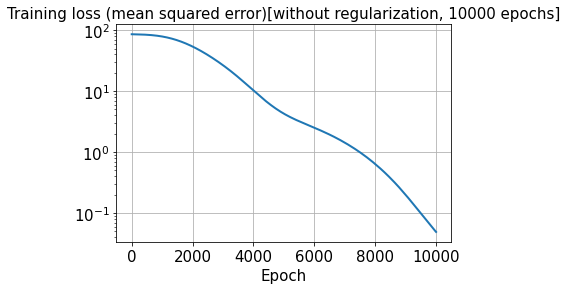

In [53]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.yscale("log")
plt.title('Training loss (mean squared error)[without regularization, 10000 epochs]', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid()
plt.show()

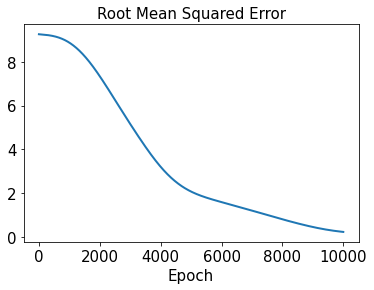

In [43]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [44]:
decoded_sensor_train = sensor_pred1.predict(t_train)

In [45]:
decoded_sensor_test = sensor_pred1.predict(t_test)

In [46]:
error_train_abs = np.abs(decoded_sensor_train - x_train)

In [47]:
error_test_abs = np.abs(decoded_sensor_test - x_test)

In [48]:
error_train_abs

array([[[3.90868187e-03],
        [2.90130138e-02],
        [2.16633320e-02],
        [2.92105675e-03],
        [1.12016201e-02],
        [7.74410248e-02],
        [6.58005714e-02],
        [7.45600700e-02],
        [5.34197807e-02],
        [3.28216553e-02],
        [1.98278618e-01],
        [3.61913681e-02],
        [9.81307983e-02],
        [8.04222107e-02],
        [1.46663666e-01],
        [2.73464394e-01]],

       [[1.18389904e-02],
        [8.92421365e-02],
        [6.56495929e-02],
        [8.63869190e-03],
        [3.31453085e-02],
        [2.35754538e-01],
        [2.01233053e-01],
        [2.25618029e-01],
        [1.59692001e-01],
        [1.06692791e-01],
        [6.14475918e-01],
        [1.15602875e-01],
        [3.18624592e-01],
        [2.72009659e-01],
        [4.75070000e-01],
        [8.61954880e-01]],

       [[5.49478531e-03],
        [4.10589218e-02],
        [3.04606915e-02],
        [4.06460762e-03],
        [1.55906677e-02],
        [1.09104347e-01],
        

In [49]:
l2_error_sensor_train = np.sqrt(np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2))
print(l2_error_sensor_train)

0.02390769418709898


In [50]:
l2_error_sensor_test = np.sqrt(np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2))
print(l2_error_sensor_test)

0.02335180922284089
